## Presentación

Estos ejercicios tienen el fin de poder evaluar la situación en la que se encuentra cada unx de ustedes a esta altura de la materia. No es un examen, ni llevará ningún tipo de nota.

Les pedimos que respeten al pie de la letra el nombre de las funciones que les damos para completar y su "signature". Esto es, que respeten los argumentos de entrada y la salida. Esto es porque tenemos una forma de verificación automática que de otra manera no funciona. Cuando hayamos recibido los notebooks, haremos público el código de control.

Por supuesto, si quieren agregar celdas y más código, si quieren hacer pruebas para asegurarse de que el código funciona, etc., pueden hacerlo aquí mismo.

La _modalidad de entrega preferencial_ es a través de GitHub:
1. Hacer un fork del [repositorio](https://github.com/exord/UNSAM_IA), tocando el botón de arriba a la derecha (ver figura). 

2. Crear un subdirectorio dentro del directorio <tt>entregas</tt> con el formato "ApellidoNombre"
3. Completar este notebook y colocarlo en ese directorio. Hacer un "commit" y un "push" a su versión del repositorio.
4. Realizar un <tt>pull request</tt> desde GitHub y seguir las instrucciones. Más información en la [página de GitHub](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-pull-requests).

De ser necesario, en caso de sufrir de **alergia severa a GitHub**, el notebook puede enviarse por email.

La **fecha límite** para la entrega es el **martes 21 de abril a las 20 horas**.

<figure>
    <img src="https://github.com/exord/UNSAM_IA/blob/master/figures/fork_pullrequest.jpeg?raw=1", alt="Fork", width="800px", 
         style="float: left; margin-right: 10px;"/>
    
     <figcaption>Fig.1 - Ubicación de los botones para Fork y Pull request en Github.</figcaption>
</figure>

## 1. Probabilidad Condicional

In [0]:
#Si estas en Google Colab, ejecuta esta celda una unica vez:
!mkdir datasets
!mkdir datasets/student-alcohol-consumption
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
!mv student-mat.csv datasets/student-alcohol-consumption/student-mat.csv

--2020-04-20 18:08:29--  https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/plain]
Saving to: ‘student-mat.csv’

student-mat.csv     100%[===================>]  41.00K  --.-KB/s    in 0.01s   

2020-04-20 18:08:29 (2.84 MB/s) - ‘student-mat.csv’ saved [41983/41983]



Similar al ***Caso: Apruebo si falto a clase?*** del [notebook de probabilidad condicional](02_Condicional.ipynb), calcule la probabilidad de que un alumno haya faltado menos de 3 veces dado que sacó más de un 60% en la materia, i.e.
$$
P( \text{absences} < 3 | \text{G3} \geq 12).
$$

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

In [0]:
import numpy as np
import pandas as pd

def prob_condicional(
  df=pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')):
      """Calcula P(absences < 3 | G3 >= 12).

    Input:
    df -- dataset de estudiantes

    Output:
    p        -- probabilidad de que absences < 3 dado que G3 >= 12
    """
  #Start
  N = len(df)
  Aprobados = np.where(df['G3'] >= 12, 1, 0)
  Regulares = np.where(df['absences'] <3, 1, 0) 

  datas = {'Aprobados': Aprobados,
        'Regulares': Regulares
        }

  df2 = pd.DataFrame(datas, columns = ['Aprobados', 'Regulares'])

  df2['Ap_Reg'] =  np.where((df2['Aprobados']==1) & (df2['Regulares']==1), 1, 0)

  
  N_reg = np.sum(df2['Regulares'])
  N_ap = np.sum(df2['Aprobados'])
  N_apreg = np.sum(df2['Ap_Reg'])
  
  P_apreg = N_apreg/N
  P_ap = N_ap/N
  P_out = P_apreg/P_ap
  resultado = P_out
  #Finish
  return resultado

IndentationError: ignored

In [0]:
"""
-------------------- TEST -----------------------
"""
import numpy as np
import pandas as pd 
df=pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')
N = len(df)
Aprobados = np.where(df['G3'] >= 12, 1, 0)
Regulares = np.where(df['absences'] <3, 1, 0) 
datas = {'Aprobados': Aprobados,
        'Regulares': Regulares
        }
df2 = pd.DataFrame(datas, columns = ['Aprobados', 'Regulares'])
df2['Ap_Reg'] =  np.where((df2['Aprobados']==1) & (df2['Regulares']==1), 1, 0)
df2['cuenta'] = 1

pd.pivot_table(
    df2,
    values = 'cuenta',
    index = ['Aprobados'],
    columns = ['Regulares'],
    aggfunc = np.sum,
    fill_value = 0)

N_reg = np.sum(df2['Regulares'])
N_ap = np.sum(df2['Aprobados'])
N_apreg = np.sum(df2['Ap_Reg'])
  
P_apreg = N_apreg/N
P_ap = N_ap/N
P_reg = N_reg/N
P_out = P_apreg/P_ap

print("Regulares: {}".format(N_reg))
print("Aprobados: {}".format(N_ap))
print("Regulares y aprobados: {}".format(N_apreg))

print("Probabilidad de ser regular: {}".format(P_reg))
print("Probabilidad de aprobar: {}".format(P_ap))
print("Probabilidad de regularizar y aprobar: {}".format(P_apreg))
print("Probabilidad de ser regular estando aprobado: {}".format(P_out))


Regulares: 183
Aprobados: 162
Regulares y aprobados: 81
Probabilidad de ser regular: 0.46329113924050636
Probabilidad de aprobar: 0.41012658227848103
Probabilidad de regularizar y aprobar: 0.20506329113924052
Probabilidad de ser regular estando aprobado: 0.5


Probabilidad condicional
===

$$ P(\text{G3>12}) = \frac{81 + 81}{395} $$ 
$$ P(\text{absences<3}) = \frac{102 + 81}{395} $$
$$ P(\text{G3>12} \cap \text{absences<3}) = \frac{81}{395} $$
$$  P(\text{absences<3}\, |\, \text{G3>12}) = \frac{P(\text{absences<3} \cap \text{G3>12})}{P(\text{G3>12})} $$

In [0]:
pd.pivot_table(
    df2,
    values = 'cuenta',
    index = ['Aprobados'],
    columns = ['Regulares'],
    aggfunc = np.sum,
    fill_value = 0)

Regulares,0,1
Aprobados,,
0,131,102
1,81,81


## 2. Inferencia Bayesiana

Se tira una moneda N veces, de las cuales X sale cara. La moneda sale cara con una frecuencia $\mu$ desconocida, pero que se cree que es *fair*. 

Construya una función que recibe el vector con los N resultados (1: cara, 0: seca) y con él calcule tanto el posterior del parámetro $\mu$ como la probabilidad de que $\mu>0.7$. Use como prior una distribución normal con media 0.5 y desviación estandar 0.1 ($\mathcal{N}(0.5,0.1)$)

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: usar los métodos <tt>pdf</tt> y <tt>pmf</tt> de las clases de <tt>scipy.stats</tt> que se importan al principio de la celda. Revisar también los notebooks de [teoría](03_Inferencia.ipynb) y [práctica](03p_Inferencia_Soluciones.ipynb) que se presentaron en clase.

In [0]:
import numpy as np
from scipy.stats import binom, norm

def inferencia_moneda(tiradas, seed=123):
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed)
    mu, step = np.linspace(0,1,num=100, retstep=True) #step es el espacio entre puntos
    
    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)
    
    #Start
    prior = norm.pdf(mu, 0.5, 0.1) #Esto es el prior evaluado en el vector mu
    verosimilitud = binom.pmf(X,N,mu) #La verosimilitud evaluada en el vector mu
    posterior = prior*verosimilitud #el posterior no normalizado
    evidencia = posterior.sum()*step #evidencia o verosimilitud marginalizada
    posterior = posterior/evidencia #normalizamos para obtener el posterior
    p = posterior[mu>0.7].sum()*step #Probabilidad de que mu > 0.7 
    #Finish

    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior),np.array(verosimilitud),np.array(prior),np.array(mu)

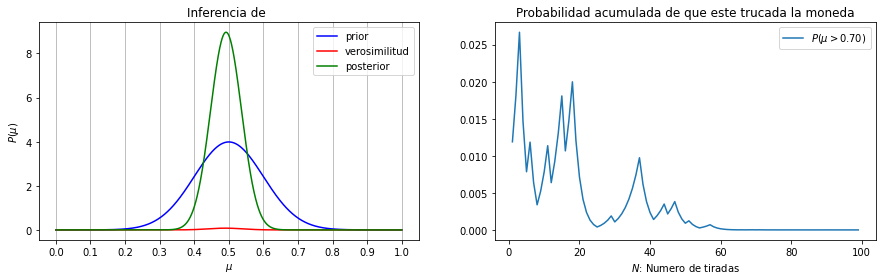

In [87]:
"""
-------------------- TEST -----------------------
"""
# Librerias Imports
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt

seed = 123
np.random.seed(seed)
N_tiradas=100
mu_t = 0.5
#tiradas = np.round(np.random.rand(100),decimals=0) # Genera al azar N=100 tiradas de una moneda con mu_t = 0.5.
tiradas = np.where(np.random.rand(N_tiradas) < mu_t, 1, 0) # Genera al azar 100 tiradas de una moneda con mu_t = 0.5.

mu, step_mu = np.linspace(0,1,num=1000, retstep=True) # Espacio de 0 a 1 de 1000 puntos equiseparados (1/1000 = 0.001)
prior = norm.pdf(mu, 0.5, 0.1) #Esto es el prior normal, media 0.5 desv 0.1, evaluado en el vector mu

verosimilitud = binom.pmf(np.sum(tiradas),len(tiradas),mu) #La verosimilitud de las tirar una moneda buena N=100 veces evaluada en el vector mu
posterior = prior*verosimilitud #el posterior no normalizado
evidencia = posterior.sum() * step_mu #evidencia o verosimilitud marginalizada, es decir el area bajo la curva
posterior_norm = posterior/evidencia #normalizamos para obtener el posterior

p_mu_mayor07 = posterior[mu>mu_threshold].sum() * step_mu

fig = plt.figure(figsize=(15, 4)) 

plt.subplot(121)
plt.title('Inferencia de prior y datos sobre verosimilitud')
plt.plot(mu, prior,'b',label='prior')
plt.plot(mu, verosimilitud,'r',label='verosimilitud')
plt.plot(mu, posterior_norm,'g',label='posterior')
plt.legend()
plt.grid(axis='x')
plt.xticks(np.arange(0, 1+step, step=0.1))  # Set label locations.
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')

##########################################
# Calculo para las primeras N_test tiradas como varía la probabilidad de que la moneda este trucada (mu distinto de mu_t)
prob = []
mu_threshold = 0.7
N_test = 100
N_range = range(1,N_test)
for N in N_range:
    verosimilitud = binom.pmf(tiradas[:N].sum(),N,mu)    #verosimilitud binomial
    posterior = prior*verosimilitud    #posterior no normalizado
    evidence = posterior.sum()*step_mu    #calculo el area bajo la curva (son 1000 puntos equiespaciados)
    posterior = posterior/evidence    #normalizo el posterior
    prob.append(posterior[mu>mu_threshold].sum() * step_mu)    #probabilidad de que p>p_threshold

plt.subplot(122)
plt.title('Probabilidad acumulada de que este trucada la moneda')
plt.plot(N_range,prob, label = '$P(\mu > {:.2f})$ '.format(mu_threshold) )
plt.xlabel('$N$: Numero de tiradas')
#plt.axhline(0.95, label='95% confidence', c='red')
plt.legend()




La probabilidad de que mu sea mayor a 0.7 es de 4.816486020393553e-07


Text(0, 0.5, '$P(\\mu)$')

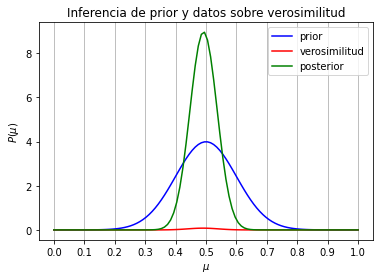

In [103]:
"""
    TEST FUNC
"""
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt

mu_t = 0.5      # mu verdadero
N_tiradas = 100 # número de tiradas

tiradas = np.where(np.random.rand(N_tiradas)< mu_t, 1, 0) # Genera al azar 100 tiradas de una moneda con mu = 0.5.

p, posterior,verosimilitud,prior,mu= inferencia_moneda(tiradas)

print('La probabilidad de que mu sea mayor a 0.7 es de {}'.format(p))

plt.title('Inferencia de prior y datos sobre verosimilitud')
plt.plot(mu, prior,'b',label='prior')
plt.plot(mu, verosimilitud,'r',label='verosimilitud')
plt.plot(mu, posterior,'g',label='posterior')
plt.legend()
plt.grid(axis='x')
plt.xticks(np.arange(0, 1+step, step=0.1))  # Set label locations.
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')


## 3. Regresión Lineal

Construye una función que dado un input (X_train, Y_train) realice un ajuste lineal de cuadrados mínimos, y con ello devuelva las predicciones para el input X_test como un vector Y_test.

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: pueden usar la implementación de las ecuaciones normales que aparece en el notebook de [modelos lineales](05_ModelosLineales.ipynb) o las clases del módulo <tt>sklearn.linear_model</tt>.

In [0]:
import numpy as np

def ajuste_lineal(X_train, Y_train, X_test):
  """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

  N=len(X_train)
  N_test=len(X_test)
  #Start
  phi = np.hstack([X_train*0.0 + 1,X_train])  
  phip = np.dot(phi.T, phi)             # transformo
  # Entreno mi modelo
  yy = np.dot(phi.T, Y_train)           
  wml = np.linalg.solve(phip, yy)       
  # Predigo
  phi_test = np.hstack([X_test*0.0 + 1, X_test])  
  Y_test = phi_test @ wml
  #Finish
  assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
  return np.array(Y_test)

Error RMSE para un polinomio de grado 1: 0.094
Los parámetros son [[0.         0.50017721]]


<function matplotlib.pyplot.axis>

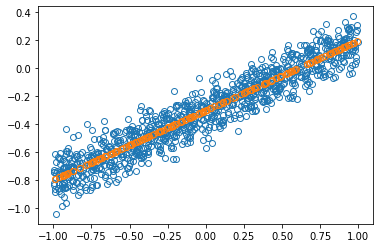

In [121]:
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp
from sklearn.metrics import mean_squared_error

# Parámetros de la ground truth
b = -0.3
m = 0.5
beta = 1/1 # inversa de la covarianza
n = 1000

x_t = 2 * np.random.rand(n, 1)-1

# El modelo real (ground truth)
y_t = b + m * x_t

# Agregemos error normal a los datos
mu=0        # mean and 
sigma = 0.1 # standard deviation
y_t = y_t + np.random.normal(mu, sigma, [n,1])

#plt.scatter(x_t,y_t)
#------------------------------------------------------------------------

sk_train, sk_test = train_test_split(np.hstack([x_t, y_t]), test_size=0.2, random_state=1234)

x_tr = sk_train[:, 0].reshape(len(sk_train), 1)
y_tr = sk_train[:, 1].reshape(len(sk_train), 1)
x_tt = sk_test[:, 0].reshape(len(sk_test), 1)
y_tt = sk_test[:, 1].reshape(len(sk_test), 1)

modelo = Pipeline([('features', pp.PolynomialFeatures(degree=1)),
                   ('regression', LinearRegression())
                  ])
        
modelo = modelo.fit(x_tr, y_tr) # entreno fiteando
y_pred = modelo.predict(x_tt)        # predigo 
errors = print_results(modelo, y_tt, y_pred) #miro errores entre y puntos de entrenamiento y predicciones

# First plot data and truth
plt.plot(x_t, y_t, 'o', mfc='None')
plt.plot(x_tt, y_pred, 'o', mfc='None')
plt.axis                

In [0]:
def print_results(polyreg, truth, prediction):
    rmse = mean_squared_error(prediction, truth, squared=False)
    print('Error RMSE para un polinomio de grado {}'
          ': {:.3f}'.format(polyreg.named_steps['features'].degree, rmse))
    print('Los parámetros son {}'.format(polyreg.named_steps['regression'].coef_))
    
    return rmse, polyreg.named_steps['regression'].coef_

#print_results(polyregression, y, t)

<function matplotlib.pyplot.axis>

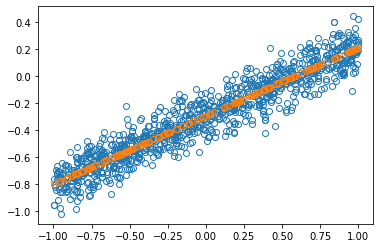

In [127]:
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt
# Parámetros de la ground truth
b = -0.3
m = 0.5
beta = 1/1 # inversa de la covarianza
n = 1000

x_t = 2 * np.random.rand(n, 1)-1

# El modelo real (ground truth)
y_t = b + m * x_t

# Agregemos error normal a los datos
mu=0        # mean and 
sigma = 0.1 # standard deviation
y_t = y_t + np.random.normal(mu, sigma, [n,1])

#plt.scatter(x_t,y_t)
#------------------------------------------------------------------------

sk_train, sk_test = train_test_split(np.hstack([x_t, y_t]), test_size=0.2, random_state=1234)

x_tr = sk_train[:, 0].reshape(len(sk_train), 1)
y_tr = sk_train[:, 1].reshape(len(sk_train), 1)
x_tt = sk_test[:, 0].reshape(len(sk_test), 1)
y_tt = sk_test[:, 1].reshape(len(sk_test), 1)


y_test = ajuste_lineal(x_tr, y_tr, x_tt)

# First plot data and truth
plt.plot(x_t, y_t, 'o', mfc='None')
plt.plot(x_tt, y_test, 'o', mfc='None')
plt.axis          


